# Customer Personality Analysis

## Business Question


- What are the characteristics of customer statistics?

- What are the customer's shopping habits?

- Are there some products that need more marketing?

- How can marketing be made effective?

### Import Library


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os


import plotly.express as px

%matplotlib inline

#### Read Dataset


In [2]:
customer = pd.read_csv ("marketing_campaign.csv",delimiter= "\t")

In [3]:
customer.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

#### Data Preparation


In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
#checking duplicated data
customer.duplicated().sum()

0

In [6]:
#checking missing value
customer.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
missing_values = customer.isna().sum().to_dict()
missing_values_df = pd.DataFrame(list(missing_values.items()), columns=['Column', 'Missing_Values'])

fig = px.bar(missing_values_df,
       x = 'Column',
       y = 'Missing_Values',
       template = 'plotly_white',
       title = 'Missing Values')
fig.show()

In [8]:
#remove missing value
customer = customer.dropna()

## Feature Engineering

### Age Customer
calculate the age of each customer from the customer's year of birth. Since customer registration with the company between 2012 and 2014, so we assume that the data was collected in January 2022 for the sake of simplicity.

In [9]:
import datetime as dt
customer['Age'] = 2022 - customer.Year_Birth

### Months Since Enrollment


###### From the date of customer registration, let's count how many months the customer is affiliated with the company.

In [10]:
customer['Dt_Customer'] = pd.to_datetime(customer['Dt_Customer'])
customer['Month_Customer'] = 12.0 * (2022 - customer.Dt_Customer.dt.year ) + (1 - customer.Dt_Customer.dt.month)

### Total Spendings


##### Customer expenses are given separately for different products. Let's add them up to calculate the customer's total expenses.

In [11]:
customer['TotalSpendings'] =  customer.MntWines + customer.MntFruits + customer.MntMeatProducts + customer.MntFishProducts + customer.MntSweetProducts + customer.MntGoldProds


### Age Groups


#### Translation results
By Age for customers into different age groups.

In [12]:
customer.loc[(customer['Age'] >= 13) & (customer['Age'] <= 19), 'AgeGroup'] = 'Teen'
customer.loc[(customer['Age'] >= 20) & (customer['Age']<= 39), 'AgeGroup'] = 'Adult'
customer.loc[(customer['Age'] >= 40) & (customer['Age'] <= 59), 'AgeGroup'] = 'Middle Age Adult'
customer.loc[(customer['Age'] > 60), 'AgeGroup'] = 'Senior Adult'

### Number of Children

##### Information is provided separately for children and youth at home for each customer. Then add them up, as they can be better represented together as the number of children in the house.

In [13]:
customer['Children'] = customer['Kidhome'] + customer['Teenhome']

### Marital Status


The Marital Status column has different string values: Together, Married, Divorced, Widowed, Alone, Absurd, YOLO. Most of them fall into the same category. So let's represent the marital status of the customer based on 2 main categories namely Partner and Single.

In [14]:
customer.Marital_Status = customer.Marital_Status.replace({'Together': 'Partner',
                                                           'Married': 'Partner',
                                                           'Divorced': 'Single',
                                                           'Widow': 'Single', 
                                                           'Alone': 'Single',
                                                           'Absurd': 'Single',
                                                           'YOLO': 'Single'})

### Removing Outliers

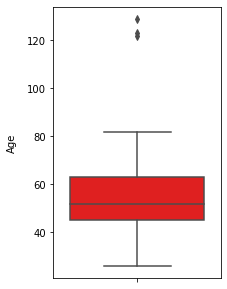

In [15]:
#showing outliers "age"
plt.figure(figsize=(3,5))
sns.boxplot(y=customer.Age, color ='red');
plt.ylabel('Age', fontsize=10, labelpad=10);

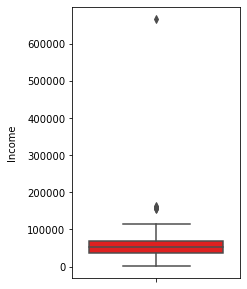

In [16]:
#showing outliers "Income"
plt.figure(figsize=(3,5))
sns.boxplot(y=customer.Income, color ='red');
plt.ylabel('Income', fontsize=10, labelpad=10);

### INSIGHT

There are some customers who are over 100 years old. This is not possible so this is an outlier.
There are some customers who earn more than 120,000 and some of them even more than 600,000. They are definitely outliers in the data.

In [17]:
#removing outliers
customer = customer[customer.Age < 100]
customer = customer[customer.Income < 120000]

## Exploratory Data Analysis


#### Marital Status


In [18]:
maritalstatus = customer.Marital_Status.value_counts()

fig = px.pie(maritalstatus, 
             values = maritalstatus.values, 
             names = maritalstatus.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 4)))
fig.show()  

### INSIGHT

2/3 of customers live with a partner while about 1/3 are single

#### Average Spendings: Marital Status Total spending


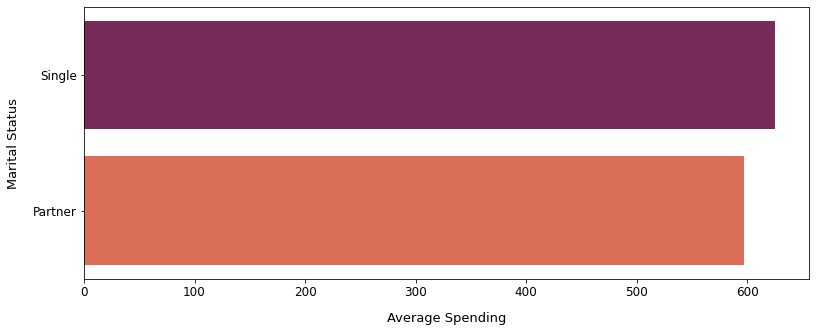

In [19]:
maritalspending = customer.groupby('Marital_Status')['TotalSpendings'].mean().sort_values(ascending=False)
maritalspending_df = pd.DataFrame(list(maritalspending.items()), columns=['Marital Status', 'Average Spending'])

plt.figure(figsize=(13,5))
sns.barplot(data = maritalspending_df, x="Average Spending", y="Marital Status", palette='rocket');

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('Average Spending', fontsize=13, labelpad=13)
plt.ylabel('Marital Status', fontsize=13, labelpad=13);

<AxesSubplot:xlabel='Marital_Status', ylabel='TotalSpendings'>

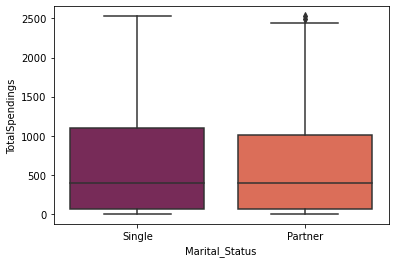

In [20]:
sns.boxplot(x="Marital_Status", y="TotalSpendings", data=customer, palette='rocket')


### INSIGHT



Despite being a minority, singles on average spend more money than customers who have partners

### Education Level


In [21]:
education = customer.Education.value_counts()

fig = px.pie(education, 
             values = education.values, 
             names = education.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

### INSIGHT

Half of the customers are University graduates
There are more customers who have PhD degrees than customers who have Masters degrees

### Child Status


In [22]:
children = customer.Children.value_counts()

fig = px.pie(children, 
             values = children.values, 
             names = children.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

### INSIGHT

About 50% of customers only have one child
28% of customers do not have children at home while 19% of them have 2 children

In [23]:
fig = px.sunburst(customer, path=['Marital_Status','Education', 'Children'], values='TotalSpendings', color='Education')
fig.show()

### Average Spendings: Child Status Total Spending


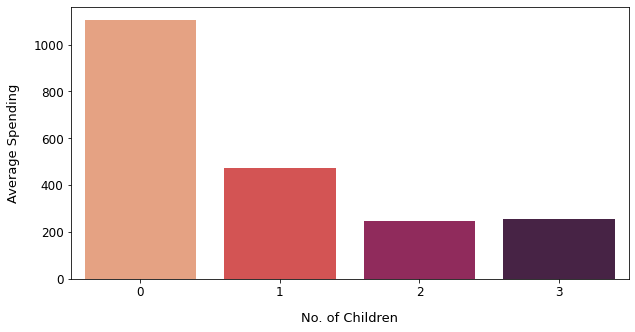

In [24]:
childrenspending = customer.groupby('Children')['TotalSpendings'].mean().sort_values(ascending=False)
childrenspending_df = pd.DataFrame(list(childrenspending.items()), columns=['No. of Children', 'Average Spending'])

plt.figure(figsize=(10,5))

sns.barplot(data=childrenspending_df,  x="No. of Children", y="Average Spending", palette='rocket_r');
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('No. of Children', fontsize=13, labelpad=13)
plt.ylabel('Average Spending', fontsize=13, labelpad=13);

### INSIGHT

Customers who do not have children at home spend more than customers who have 1 child.
Customers with 1 child spend higher than customers with 2 and 3 children.

### Age Distribution of Customers


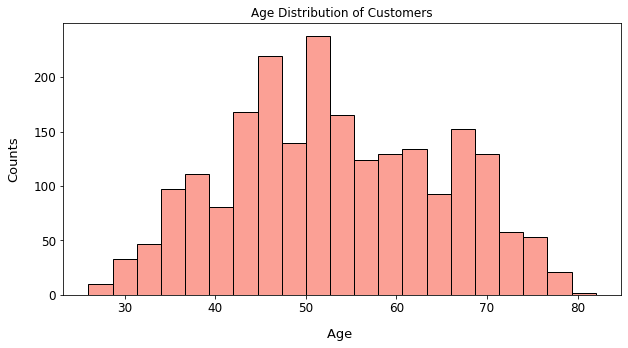

In [25]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data = customer.Age, color='salmon')
ax.set(title = "Age Distribution of Customers");
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('Age ', fontsize=13, labelpad=13)
plt.ylabel('Counts', fontsize=13, labelpad=13);

### INSIGHT

The age of the customers is almost normally distributed, with most of the customers between the ages of 40 and 60.

### Correlation : Age vs Spendings


Text(0, 0.5, 'Spendings')

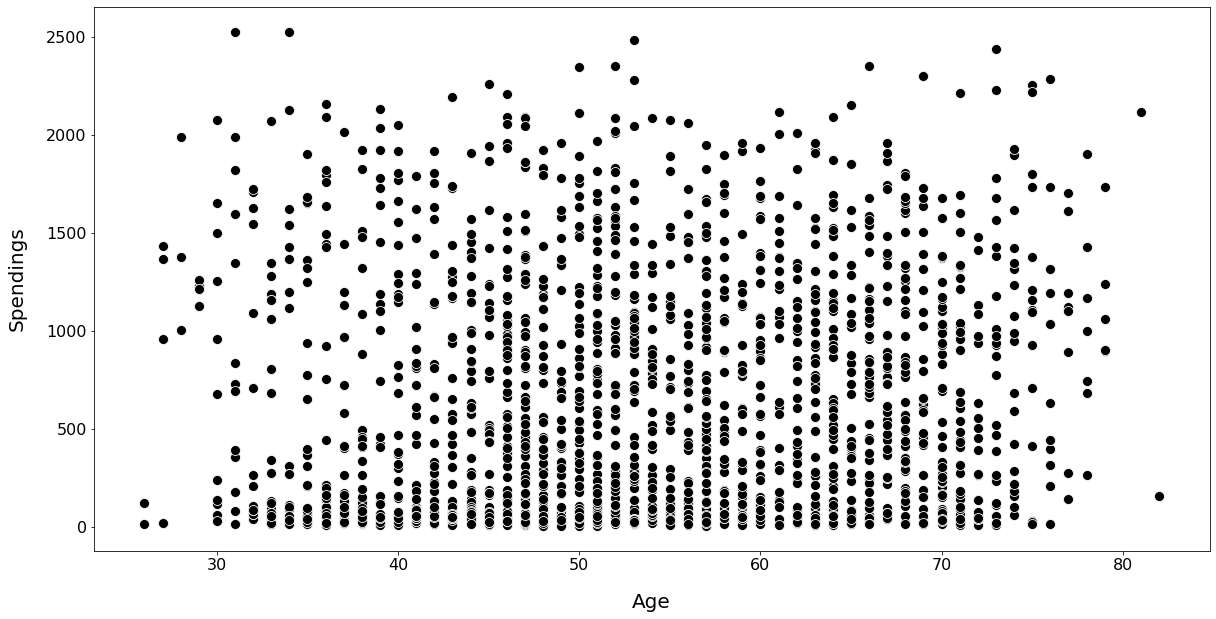

In [26]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=customer.Age, y=customer.TotalSpendings, s=100, color ='black');

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20)

### INSIGHT

There seems to be no clear relationship between the age of the customers and their shopping habits.

### Customers Segmentation: Age Group 


In [27]:
agegroup = customer.AgeGroup.value_counts()

fig = px.pie(labels = agegroup.index, values = agegroup.values, names = agegroup.index, width = 550, height = 550)

fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.4, 
                  marker = dict(colors = ['#3D0C02', '#800000'  , '#C11B17','#C0C0C0'], 
                                line = dict(color = 'white', width = 2)))

fig.update_layout(annotations = [dict(text = 'Age Groups', 
                                      x = 0.5, y = 0.5, font_size = 20, showarrow = False,                                       
                                      font_color = 'black')],
                  showlegend = False)

fig.show()

### INSIGHT



More than 50% of customers are Middle Age Adults between 40 and 60
The 2nd well-known age category is Adults, aged between 20 and 40

### Average Spendings: Age Group total spending 


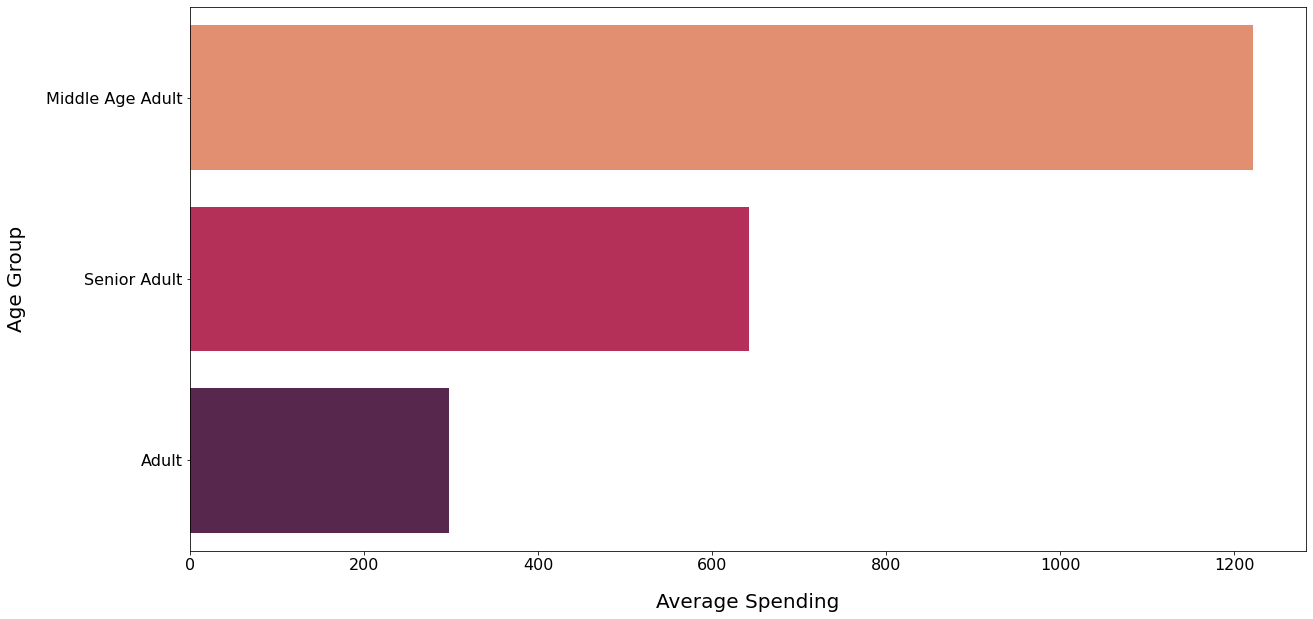

In [28]:
agegroupspending = customer.groupby('AgeGroup')['TotalSpendings'].mean().sort_values(ascending=False)
agegroupspending_df = pd.DataFrame(list(agegroup.items()), columns=['Age Group', 'Average Spending'])

plt.figure(figsize=(20,10))

sns.barplot(data = agegroupspending_df, x="Average Spending", y='Age Group', palette='rocket_r');
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Average Spending', fontsize=20, labelpad=20)
plt.ylabel('Age Group', fontsize=20, labelpad=20);

### INSIGHT



Middle-aged adults spend more than any other age group.

### Income Distribution of Customers


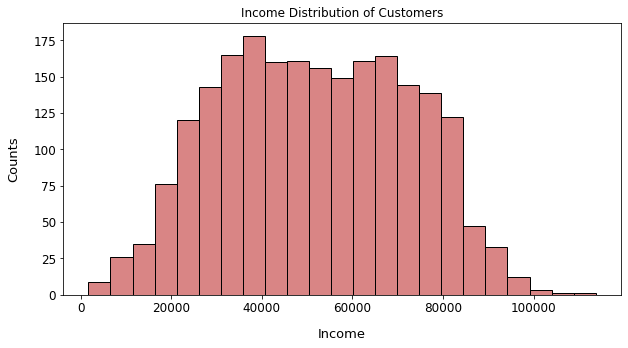

In [29]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data = customer.Income, color = "indianred")
ax.set(title = "Income Distribution of Customers");

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('Income', fontsize=13, labelpad=13)
plt.ylabel('Counts', fontsize=13, labelpad=13);

### Correlation: Income vs Spendings


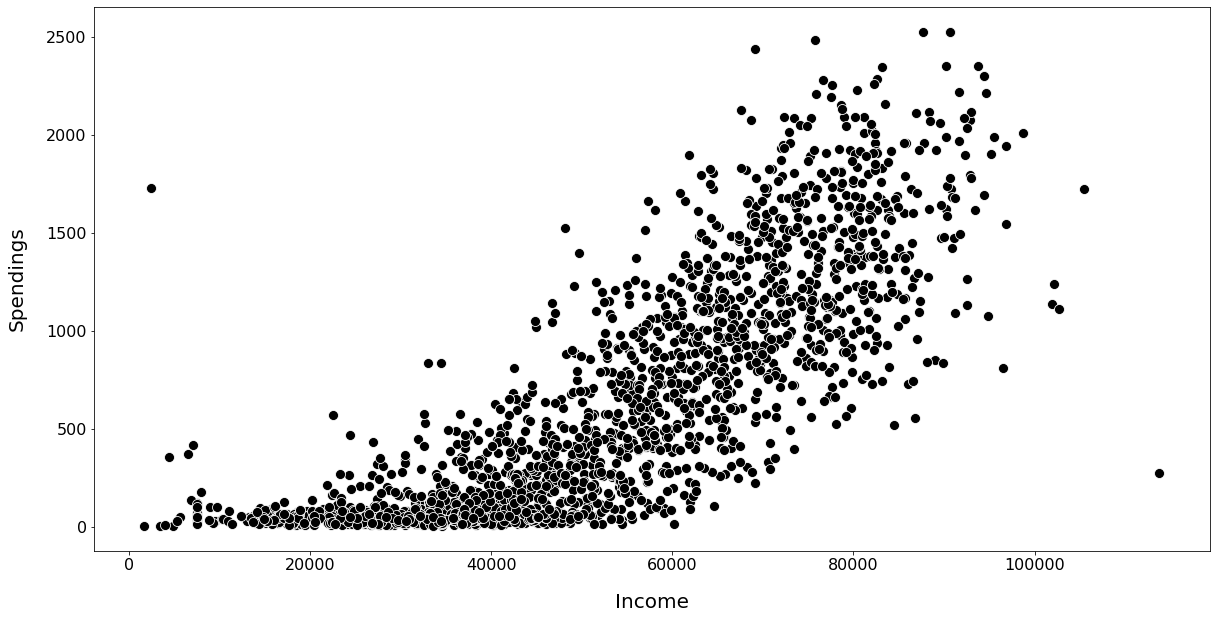

In [30]:
plt.figure(figsize=(20,10))


sns.scatterplot(x=customer.Income, y=customer.TotalSpendings, s=100, color='black');

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);

### INSIGHT



There is a linear correlation. Customers with higher salaries spend more

### Most Bought Products


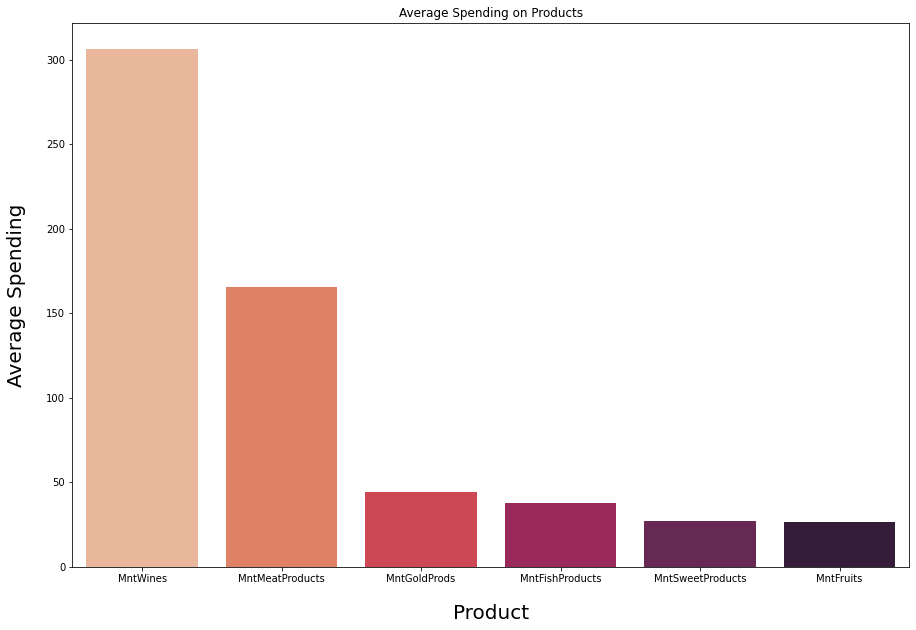

In [31]:
products = customer[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
product_means = products.mean(axis=0).sort_values(ascending=False)
product_means_df = pd.DataFrame(list(product_means.items()), columns=['Product', 'Average Spending'])

plt.figure(figsize=(15,10))
plt.title('Average Spending on Products')
sns.barplot(data=product_means_df, x='Product', y='Average Spending', palette='rocket_r');
plt.xlabel('Product', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);

### INSIGHT

Wine and Meat Products are the most famous products among customers
sweets and Fruits are not often bought

## Machine Learning Model


Let's find out different customer segments based on different features of customer data using K-Means Cluster. Let's first remove the unnecessary columns from the data.

In [32]:
X = customer.drop(['ID', 'Year_Birth','Education','Marital_Status', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits','MntMeatProducts',
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Dt_Customer', 'Z_CostContact',
                          'Z_Revenue', 'Recency', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',
                          'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                          'AcceptedCmp1', 'AcceptedCmp2', 'Complain',  'Response','AgeGroup'], axis=1)

In [33]:
X.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          2205 non-null   float64
 1   Age             2205 non-null   int64  
 2   Month_Customer  2205 non-null   float64
 3   TotalSpendings  2205 non-null   int64  
 4   Children        2205 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 167.9 KB


### Optimum Clusters Using Elbow Method


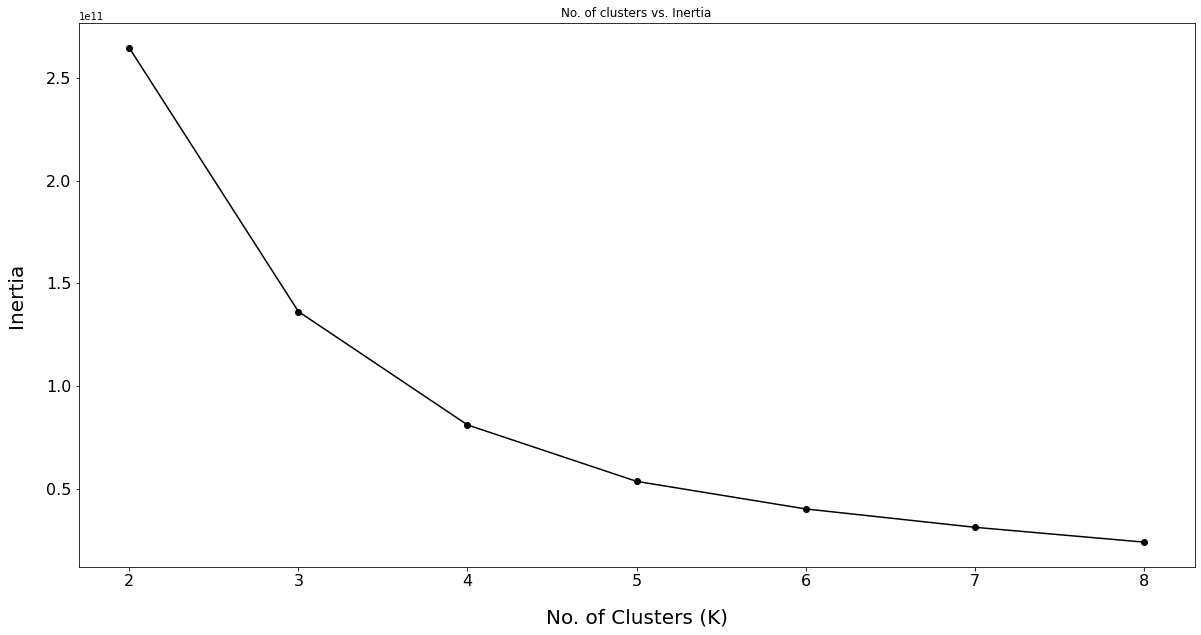

In [34]:
from sklearn.cluster import KMeans

options = range(2,9)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)

plt.figure(figsize=(20,10))    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o', color = 'black')
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('No. of Clusters (K)', fontsize=20, labelpad=20)
plt.ylabel('Inertia', fontsize=20, labelpad=20);

Based on the plot above we will group customers into 4 clusters, because the inertia value does not decrease much after 4 clusters.

In [35]:
model = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(X)

preds = model.predict(X)

customer_kmeans = X.copy()
customer_kmeans['clusters'] = preds

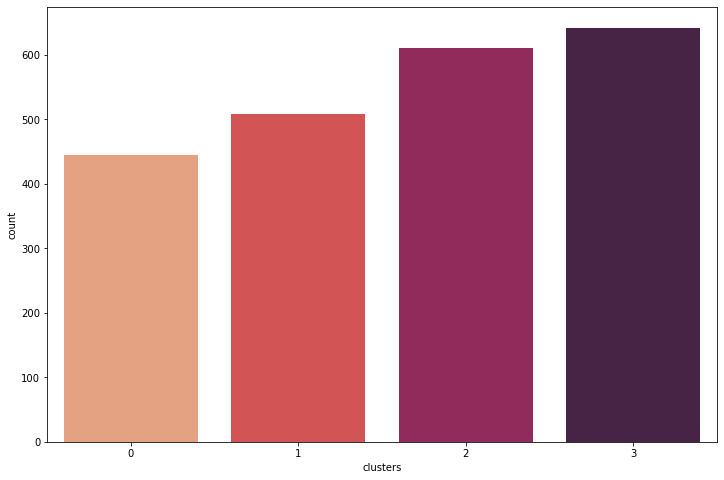

In [36]:
# count plot to see number of customers in each cluster
plt.figure(figsize=(12, 8))
sns.countplot(x='clusters', data=customer_kmeans,palette='rocket_r')
plt.show()

Cluster Platinum has least amount of customers

Cluster Silver & Gold has around same number of customers

Cluster Bronze has large number of customers among all the clusters

### Now we'll try to find out what type of customers each cluster has. How many childrens customers within each cluster has,  etc..

#####  how  many customers from each cluster have complained


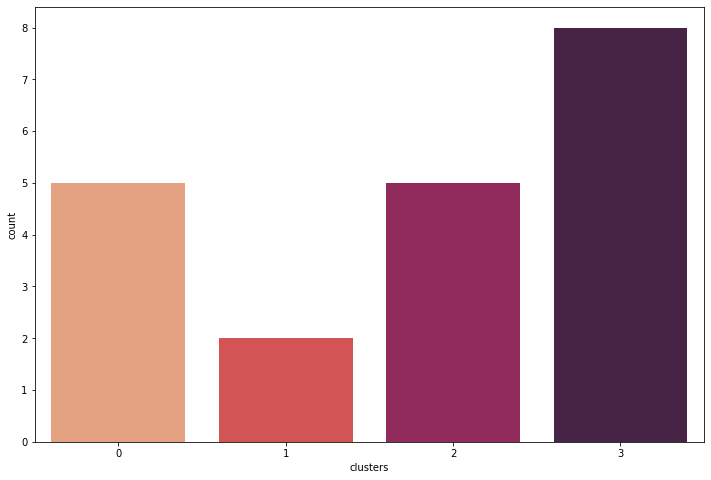

In [37]:
plt.figure(figsize=(12, 8))
sns.countplot(x='clusters', data=customer_kmeans[customer['Complain']==1], palette='rocket_r')
plt.show()

##### lets findout how  many customers from each cluster has exact number of kids or teens in household

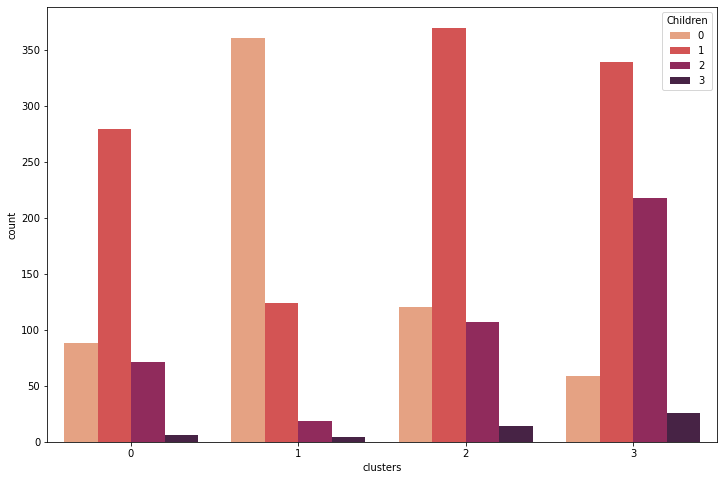

In [38]:
plt.figure(figsize=(12, 8))
sns.countplot(x='clusters', data=customer_kmeans, hue='Children' , palette='rocket_r')
plt.show()

##### It will be interesting to know the income of customers in each clusters depending on the number of children they have in household

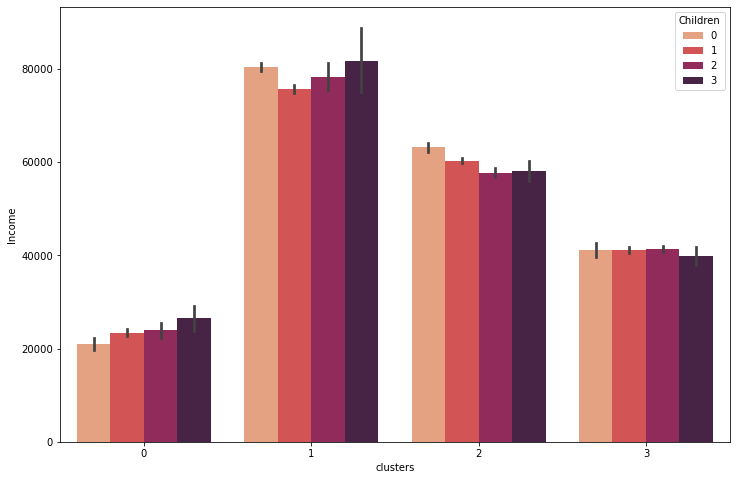

In [39]:
plt.figure(figsize=(12, 8))
sns.barplot(x=customer_kmeans["clusters"], y=customer_kmeans["Income"], hue=customer['Children'] ,palette='rocket_r')
plt.show()

### Clusters Identification


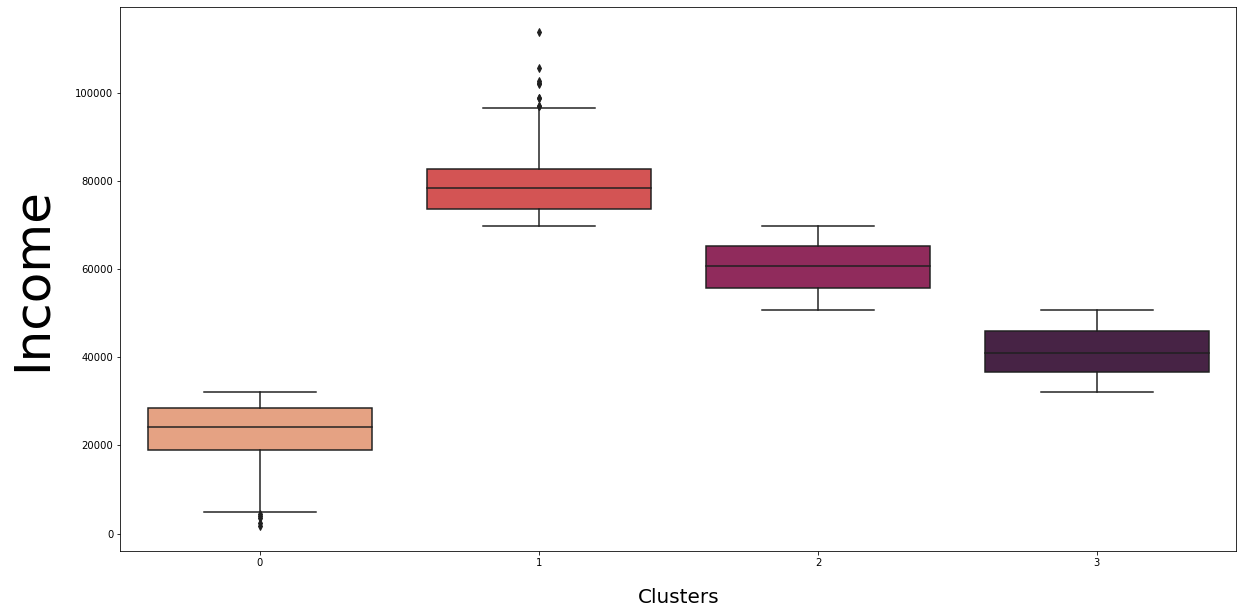

In [40]:
#Income
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Income',palette='rocket_r');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Income', fontsize=50, labelpad=20);

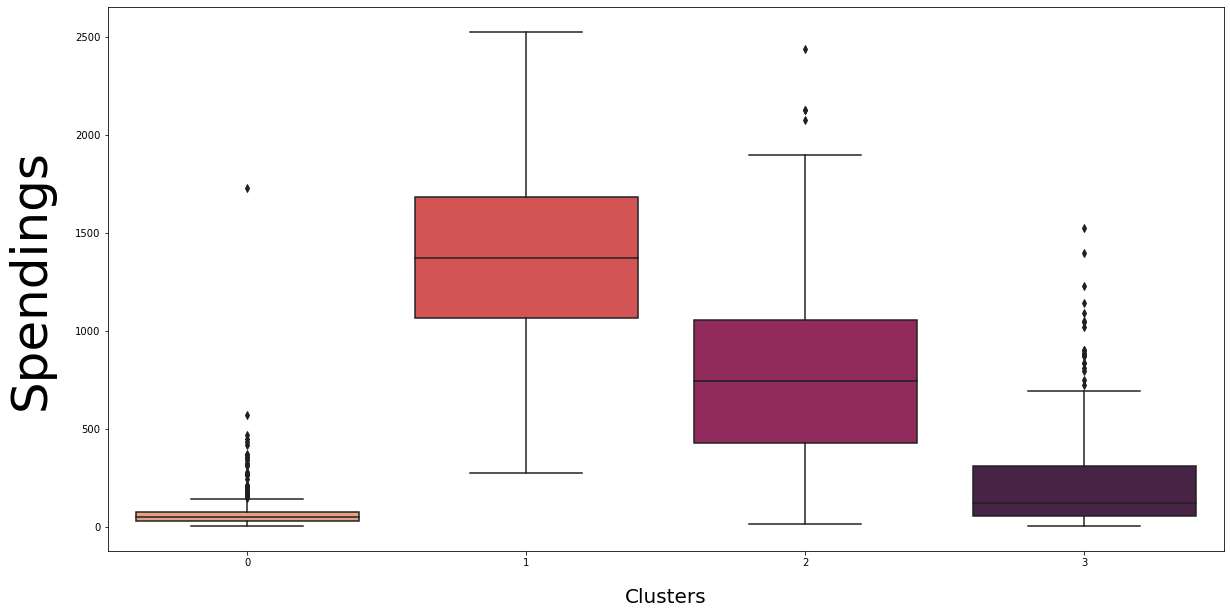

In [41]:
#Total Spending
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'TotalSpendings',palette='rocket_r');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=50, labelpad=20);

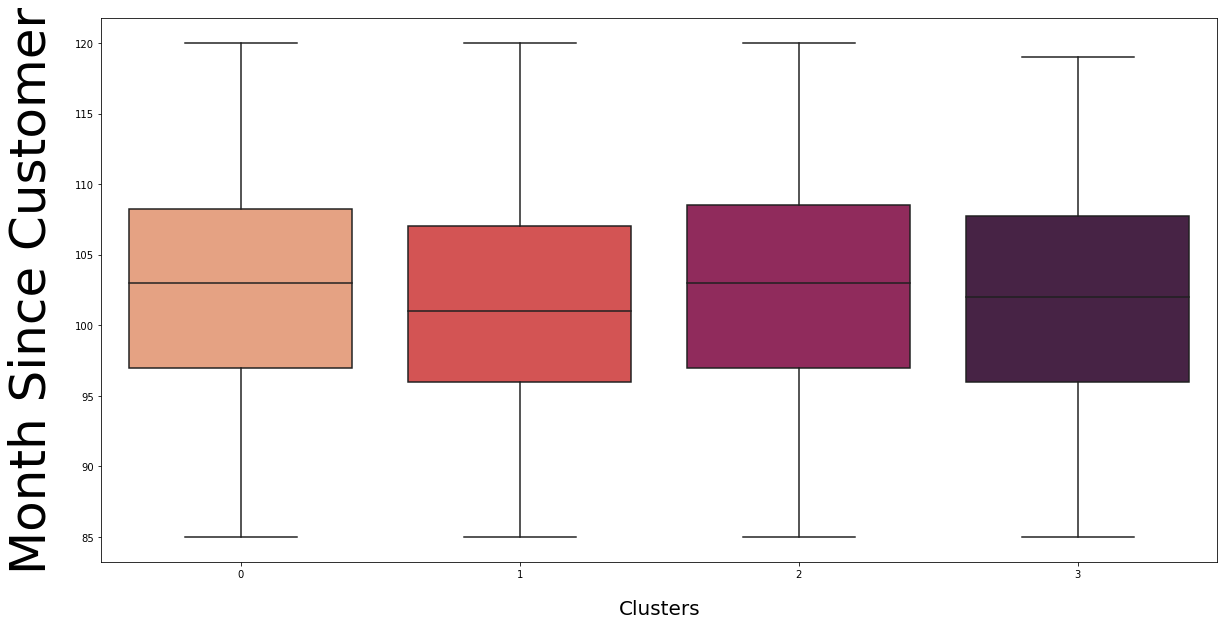

In [42]:
#Month Since Customer
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Month_Customer',palette='rocket_r');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Month Since Customer', fontsize=50, labelpad=20);

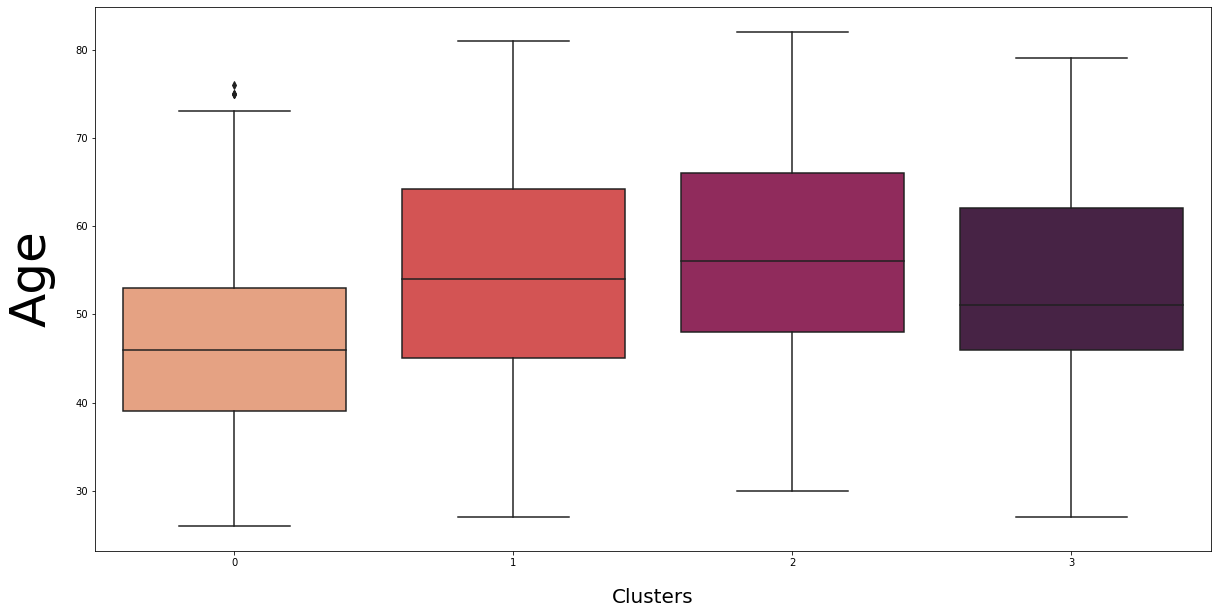

In [43]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Age',palette='rocket_r');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Age', fontsize=50, labelpad=20);

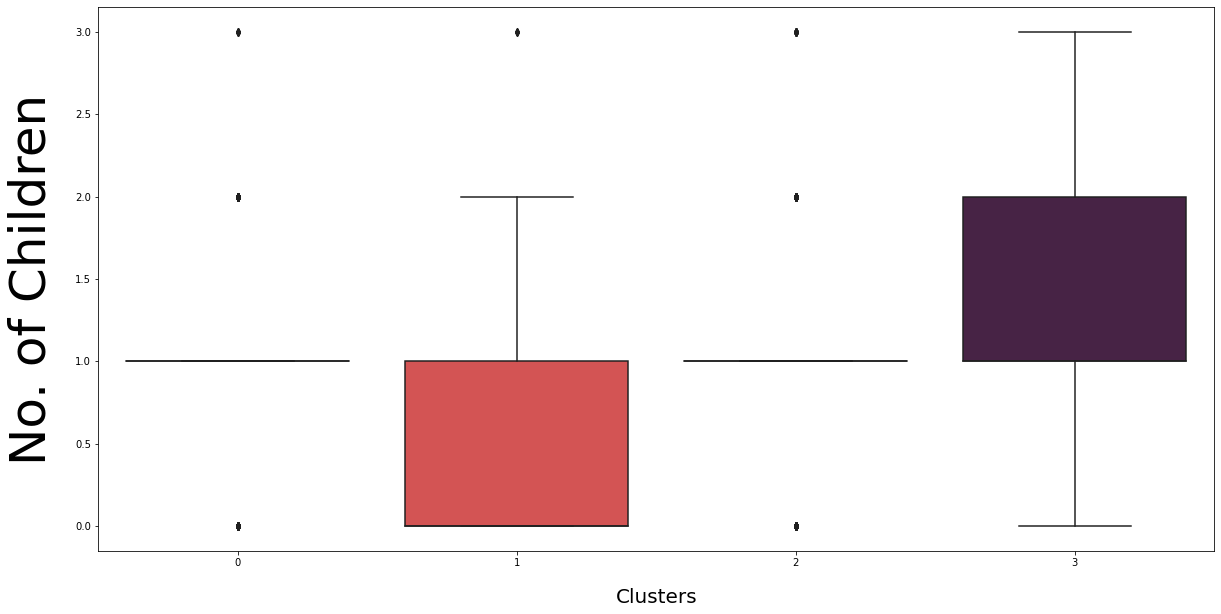

In [44]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Children',palette='rocket_r');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('No. of Children', fontsize=50, labelpad=20);

From the above analysis we can group customers into 4 groups based on their income and total expenses:

Platinum: Highest income and highest expense
Gold: High earners and high spenders
Silver: The one with lower salary and less expenses
Bronze: The one with the lowest salary and least expenses

### Data Exploration: Clusters Based


Identify customer spending habits with cluster model

In [45]:

customer_kmeans.clusters = customer_kmeans.clusters.replace({1: 'Bronze',
                                                             2: 'Platinum',
                                                             3: 'Silver',
                                                             0: 'Gold'})

customer['clusters'] = customer_kmeans.clusters

### Customers Distribution


In [46]:
cluster_counts = customer.clusters.value_counts()

fig = px.pie(cluster_counts, 
             values = cluster_counts.values, 
             names = cluster_counts.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

### INSIGHT

Most customers are in the Silver and Gold categories, around 29% and 28% respectively
Platinum is the 3rd well-known customer category with 23% while only 20% occupies the bronze category

### Correlation : Income vs. Spendings

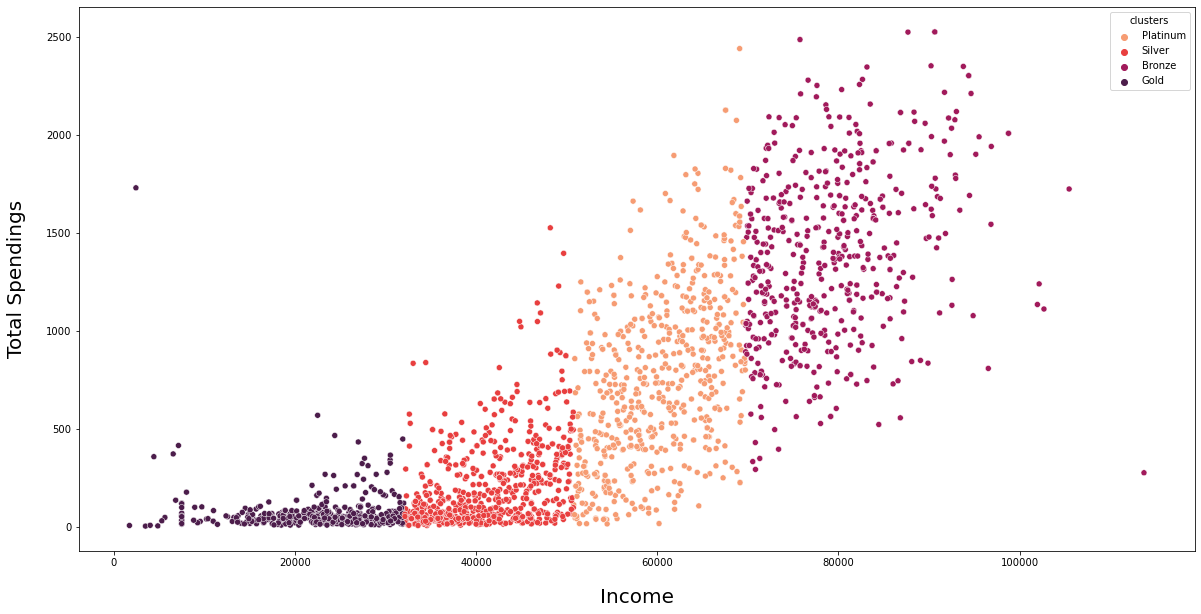

In [47]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=customer, x='Income', y='TotalSpendings', hue='clusters', palette='rocket_r');
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Total Spendings', fontsize=20, labelpad=20);

 Lets see how customers spent money on different products depending on their income

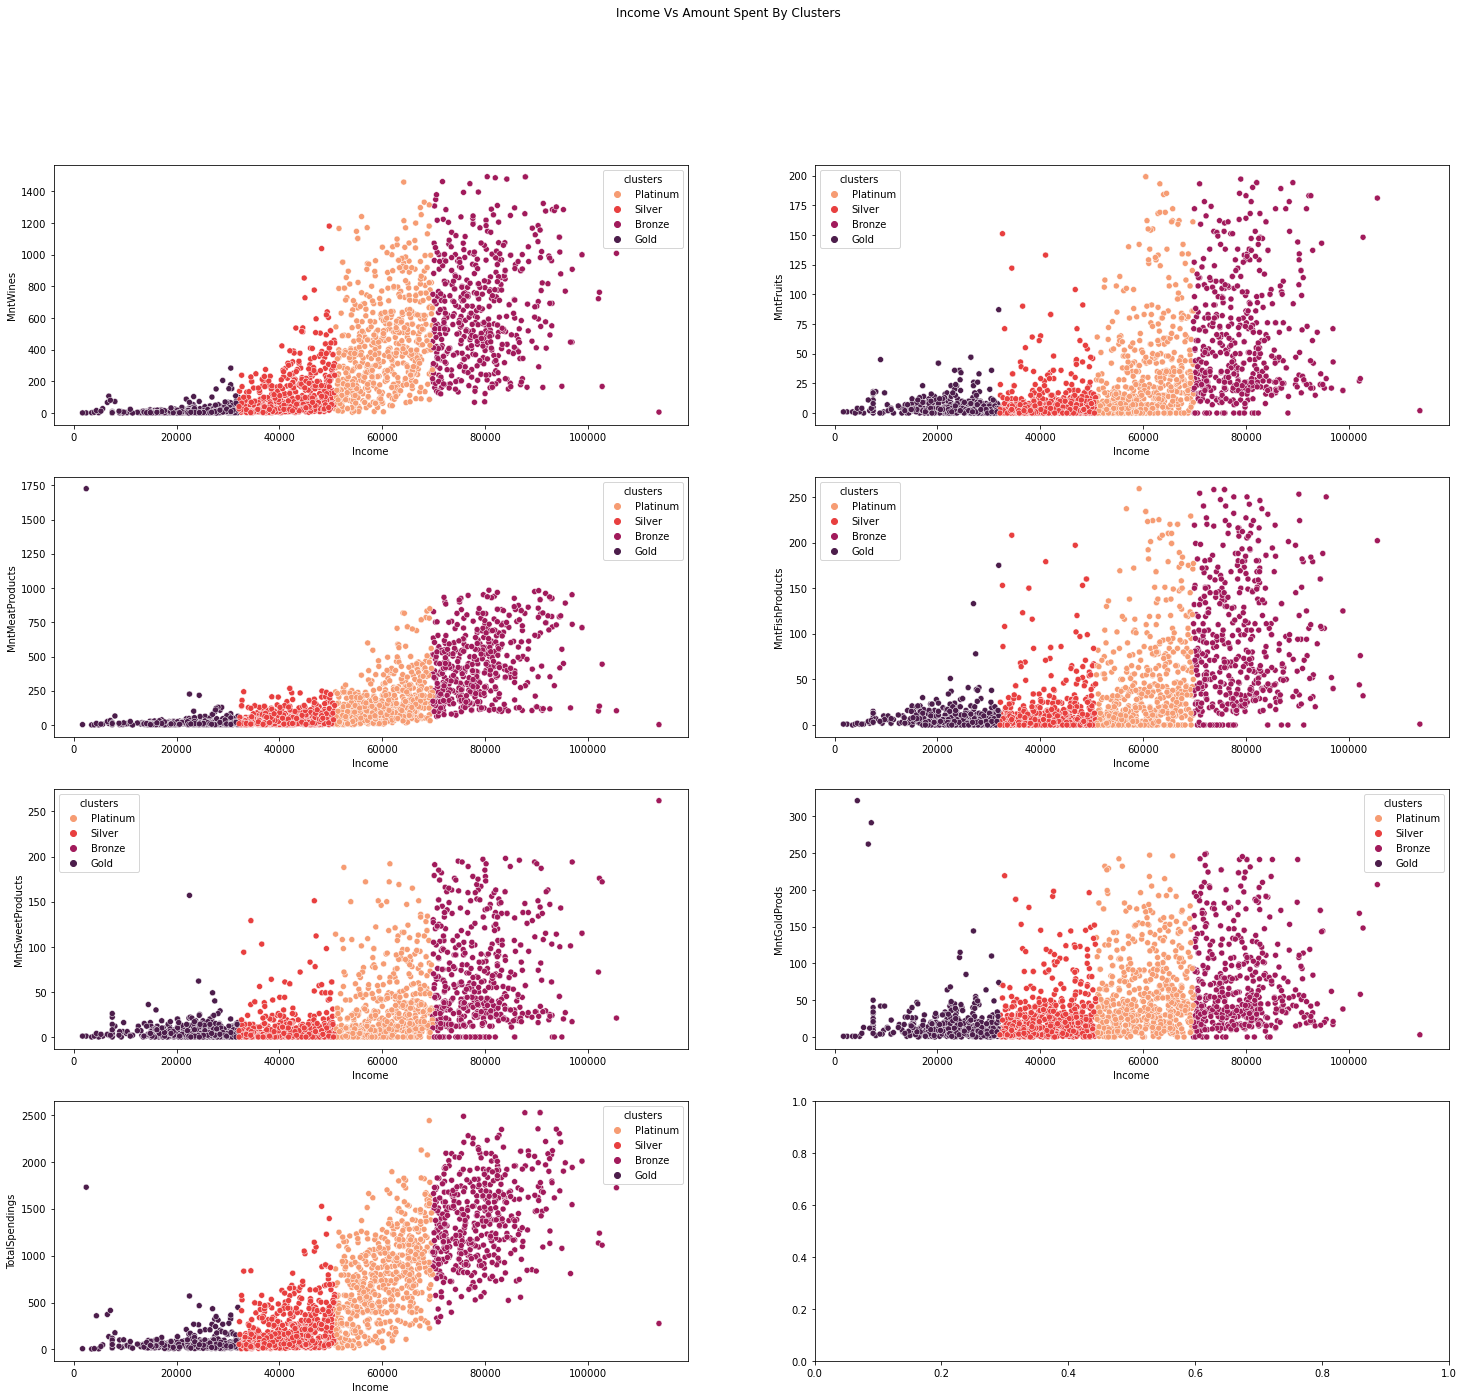

In [48]:

MntColumns= ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','TotalSpendings']

_, ax1 = plt.subplots(4,2, figsize=(25,22))
plt.suptitle('Income Vs Amount Spent By Clusters')

for i, col in enumerate(MntColumns):
    sns.scatterplot(x='Income', y=col, data=customer, ax=ax1[i//2, i%2],hue='clusters',palette='rocket_r')
    
plt.show()

### INSIGHT

4 clusters can be easily identified from the plot above
Those who earn more also spend more

### Spending Habits by Clusters


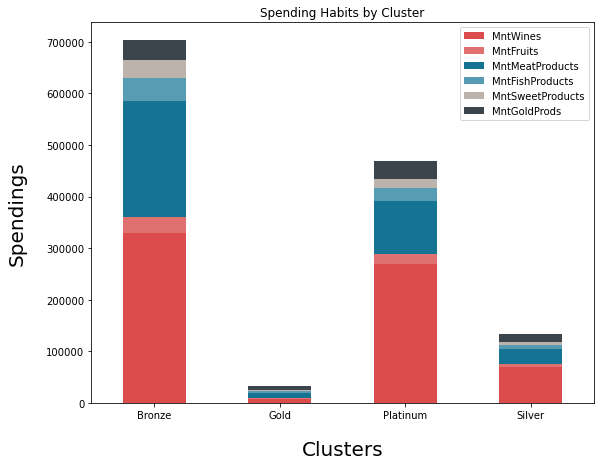

In [49]:
cluster_spendings = customer.groupby('clusters')[['MntWines', 'MntFruits','MntMeatProducts', 
                                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

cluster_spendings.plot(kind='bar', stacked=True, figsize=(9,7), color=['#dc4c4c','#e17070','#157394','#589cb4','#bcb4ac','#3c444c'])

plt.title('Spending Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

### INSIGHT

Customers from all segments have spent most of their money on Wine and Meat products

### Purchasing Habits by Clusters


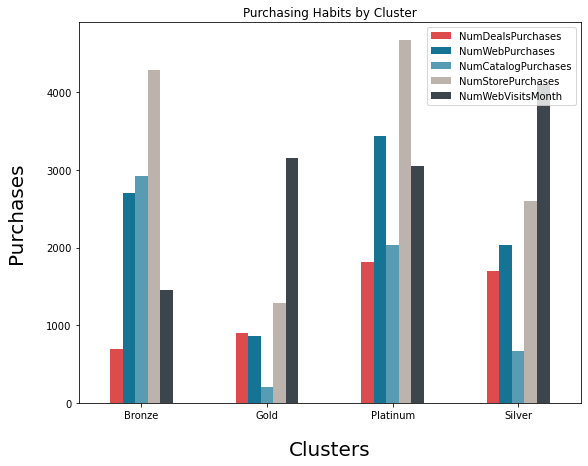

In [50]:
cluster_purchases = customer.groupby('clusters')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                                                  'NumStorePurchases', 'NumWebVisitsMonth']].sum()

cluster_purchases.plot(kind='bar', color=['#dc4c4c','#157394','#589cb4','#bcb4ac','#3c444c'], figsize=(9,7))

plt.title('Purchasing Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Purchases', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

### INSIGHT

Platinum and Gold customers are mostly likely to make in-store purchases
Most of the web and catalog purchases are also made by customers from the Platinum and Gold segments
Silver and Gold categories also like to buy from the shop
Deal buying is common among Gold and Silver customers
Silver category customers make the most web visits while customers from Platinum segment have the least web visits

### Promotions Acceptance by Clusters


<Figure size 2160x1080 with 0 Axes>

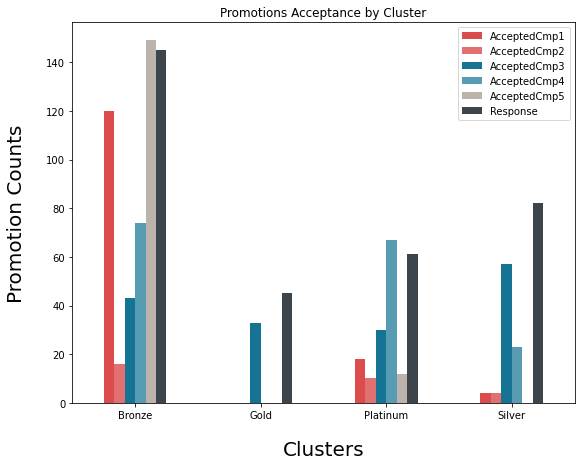

In [51]:
cluster_campaign = customer.groupby('clusters')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                                                  'AcceptedCmp5', 'Response']].sum()

plt.figure(figsize=(30,15))
cluster_campaign.plot(kind='bar', color=['#dc4c4c','#e17070','#157394','#589cb4','#bcb4ac','#3c444c'],figsize=(9,7))

plt.title('Promotions Acceptance by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Promotion Counts', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

### INSIGHT

Platinum customers receive most of the offers from the company
Campaigns 1, 5 and the last seem to be the most successful
The bronze category shows the lowest interest in the company's promotional campaign

## Conclussion

Most customers live with partners

Those who live alone have spent more than those who live with a partner

Most customers only have one child

Those without children have spent more

Middle Age Adults, aged between 40 and 60 years, are a well-known age group category

Middle-aged adults spend on average, more than any other age group

Most customers earn between 25000 and 85000

Wine and Meat Products are very famous among customers

Based on income and total expenses, customers are divided into 4 clusters, namely Platinum, Gold, Silver and Bronze
Most customers fall into the Silver and Gold category

Those who earn more also spend more

Most of the customers like to buy from the store and then online from the web
Platinum customers show more acceptance of promotional campaigns while bronze customers are least interested

## Answer to Questions :

#### What are the characteristics of customer statistics?

The company's customers are mostly married. There are more middle-aged adults, aged between 40 and 60 and most of them would like to have one child. Most of the customers hold a college degree and their income is mostly between 25,000 and 85,000

#### What are the customer's shopping habits?

Customers have spent more on wine and meat products. Those who do not have children have spent more than those who have children. Single spend more than one with a partner. Middle-aged adults have spent more than any other age group. In-store shopping is the preferred channel for buying among customers. Web and Catalog Purchasing also has potential.

#### Are there some products that need more marketing?

Sweet and Fruit products require effective marketing. Companies need to do promotions for these products in order to increase revenue from these products. A basket of products with the fewest sales combined with the products that sell the most can be effective.

#### How can marketing be made effective?

As a marketing recommendation, give coupons to existing and high-spending customers. Marketing of low-cost products and products offered to low-income and low-spending customers. Web buying has some potential. To unlock this, give a special discount to customers who register on the company's website.